# Import modules

In [25]:
from lacbox.io import load_pwr, load_ind, load_inds
from lacbox.test import test_data_path
import matplotlib.pyplot as plt
from pathlib import Path
from lacbox.io import load_ae
import numpy as np




In [26]:
# Define the list of paths
res_path = Path.cwd().parent.parent / 'res_hawc2s'
print(res_path)

ind_paths = [
    res_path / 'BB_redesign_hawc2s_multitsr_u8000.ind',
    res_path / 'BB_redesign_hawc2s_multitsr_u8001.ind',
    res_path / 'BB_redesign_hawc2s_multitsr_u8002.ind',
    res_path / 'BB_redesign_hawc2s_multitsr_u8003.ind',
    res_path / 'BB_redesign_hawc2s_multitsr_u8004.ind',
    res_path / 'BB_redesign_hawc2s_multitsr_u8005.ind',
    # res_path / 'BB_redesign_hawc2s_multitsr_u8006.ind',
    res_path / 'BB_redesign_hawc2s_multitsr_u8007.ind',
    res_path / 'BB_redesign_hawc2s_multitsr_u8008.ind',
    res_path / 'BB_redesign_hawc2s_multitsr_u8009.ind',
    res_path / 'BB_redesign_hawc2s_multitsr_u8010.ind',
    res_path / 'BB_redesign_hawc2s_multitsr_u8011.ind',
    res_path / 'BB_redesign_hawc2s_multitsr_u8012.ind',
]

C:\Users\jimwi\PycharmProjects\LAC\LAC\our_design\res_hawc2s


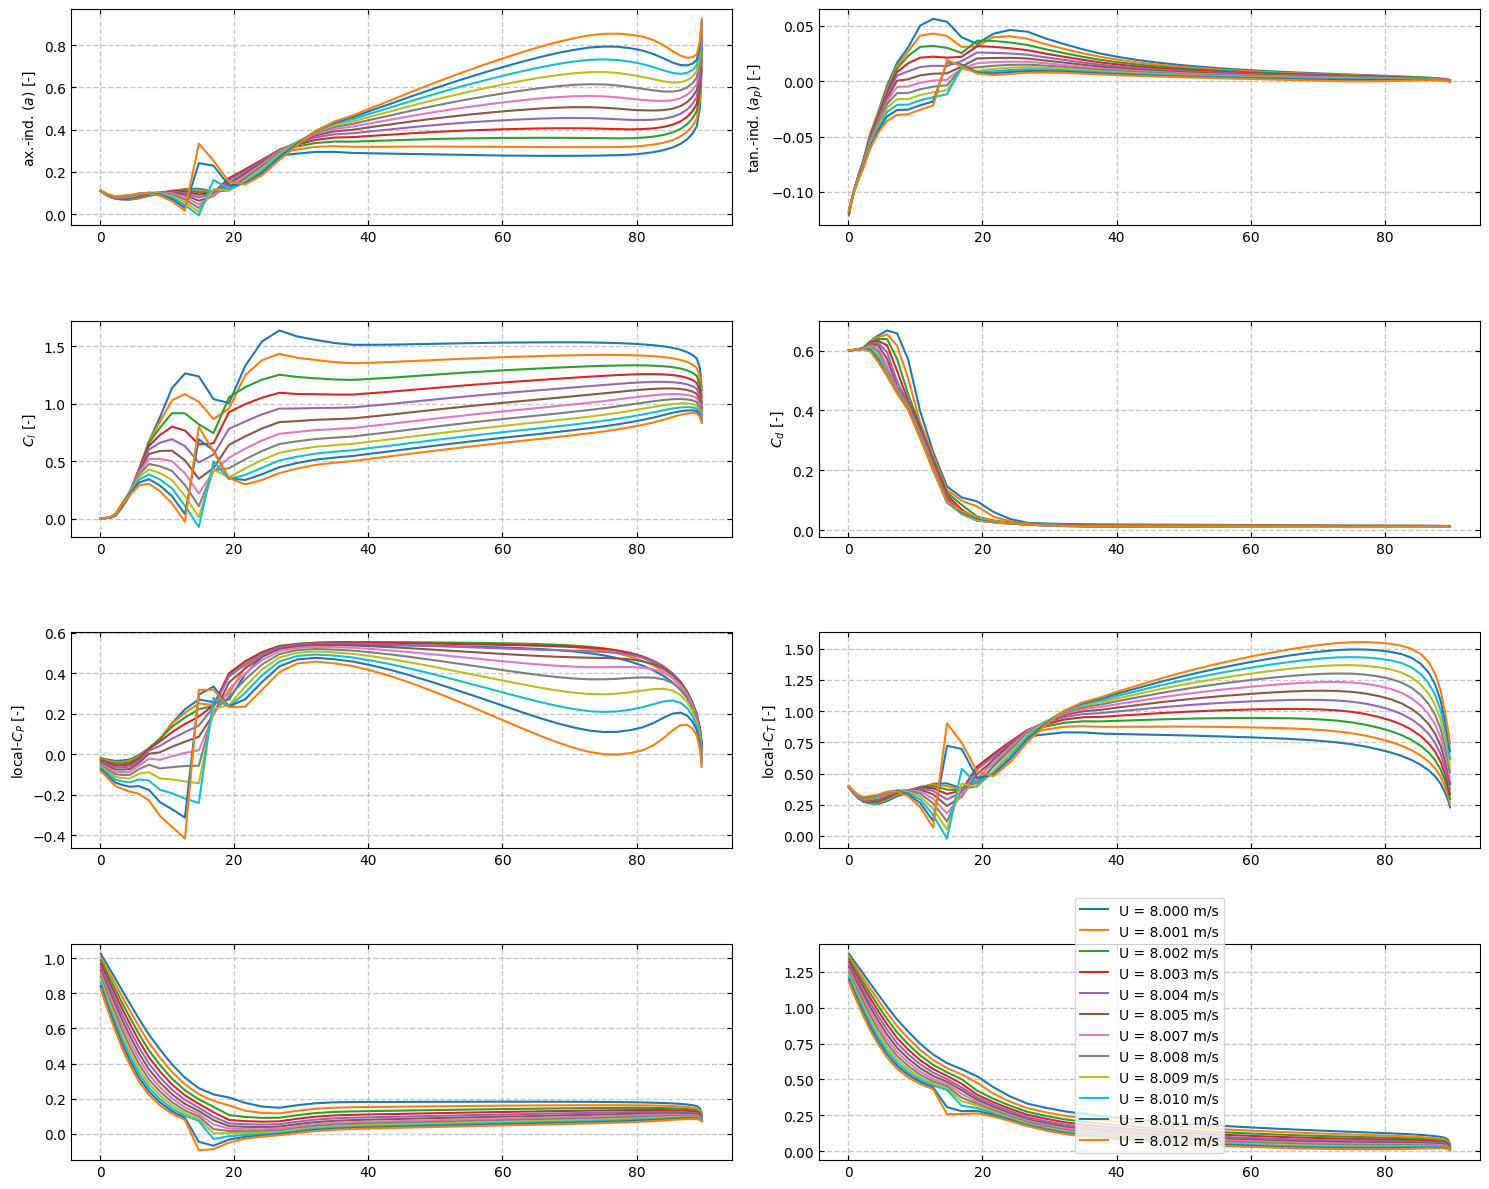

In [27]:
# Number of subplots (3 rows, 2 columns)
n_rows, n_cols = 4, 2

# Create a figure and a set of subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 12))

for ind_path in ind_paths:
    ind_data = load_ind(ind_path)

    # Extracting wind speed from the filename
    wind_speed = ind_path.stem.split('_u')[1]  # Extracts the part after '__u'
    wind_speed = f'U = {wind_speed[:1]}.{wind_speed[1:]} m/s'  # Format as U = x.xxx m/s

    # Plotting each parameter on the same subplot
    axs[0, 0].plot(ind_data["s_m"], ind_data["a"], label=wind_speed)
    axs[0, 1].plot(ind_data["s_m"], ind_data["ap"], label=wind_speed)
    axs[1, 0].plot(ind_data["s_m"], ind_data["Cl"], label=wind_speed)
    axs[1, 1].plot(ind_data["s_m"], ind_data["Cd"], label=wind_speed)
    axs[2, 0].plot(ind_data["s_m"], ind_data["CP"], label=wind_speed)
    axs[2, 1].plot(ind_data["s_m"], ind_data["CT"], label=wind_speed)
    axs[3, 0].plot(ind_data["s_m"], ind_data["aoa_rad"], label=wind_speed)
    axs[3, 1].plot(ind_data["s_m"], ind_data["flow_angle_rad"], label=wind_speed)

# Setting labels for all subplots
axs[0, 0].set_ylabel("ax.-ind. ($a$) [-]")
axs[0, 1].set_ylabel("tan.-ind. ($a_p$) [-]")
axs[1, 0].set_ylabel("$C_l$ [-]")
axs[1, 1].set_ylabel("$C_d$ [-]")
axs[2, 0].set_ylabel("Blade-span ($s$) [m]")
axs[2, 0].set_ylabel("local-$C_P$ [-]")
axs[2, 1].set_ylabel("Blade-span ($s$) [m]")
axs[2, 1].set_ylabel("local-$C_T$ [-]")

# Add legends to each subplot
for ax in axs.flat:
    ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major')
    ax.grid(linestyle='--', linewidth=1, alpha=0.7)

ax.legend()
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [28]:
# Plotting power for multiple tsr

# Path for the file
pwr_path = Path.cwd().parent.parent / 'res_hawc2s' / 'BB_redesign_hawc2s_multitsr.pwr' 
# Load the data
pwr_data = load_pwr(pwr_path)
# Print the names in the dict
pwr_data.keys()


dict_keys(['V_ms', 'P_kW', 'T_kN', 'Cp', 'Ct', 'Pitch_Q_Nm', 'Flap_M_kNm', 'Edge_M_kNm', 'Pitch_deg', 'Speed_rpm', 'Tip_x_m', 'Tip_y_m', 'Tip_z_m', 'J_rot_kgm2', 'J_DT_kgm2', 'Torsion_rad', 'Torque_kNm'])

<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jimwi\AppData\Local\Temp\ipykernel_13116\1915625111.py:11: SyntaxWarning: invalid escape sequence '\o'
  axs[1, 0].set_xlabel("Rotor-speed $\omega$ [m/s]")
C:\Users\jimwi\AppData\Local\Temp\ipykernel_13116\1915625111.py:15: SyntaxWarning: invalid escape sequence '\o'
  axs[1, 1].set_xlabel("Rotor-speed $\omega$ [m/s]")


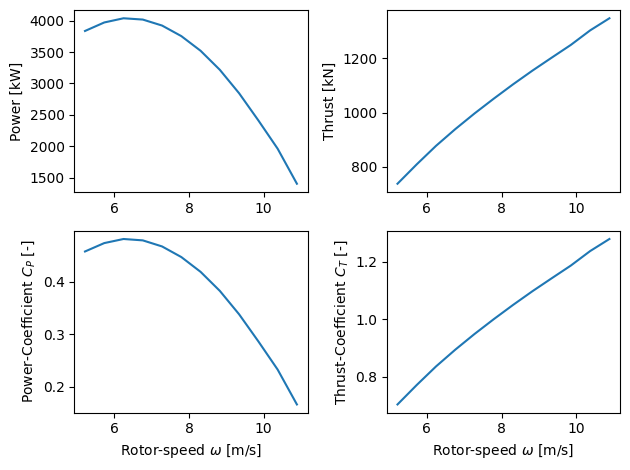

In [29]:
fig, axs = plt.subplots(2, 2)

# Power
axs[0, 0].plot(pwr_data["Speed_rpm"], pwr_data["P_kW"])
axs[0, 0].set_ylabel("Power [kW]")
# Thrust
axs[0, 1].plot(pwr_data["Speed_rpm"], pwr_data["T_kN"])
axs[0, 1].set_ylabel("Thrust [kN]")
# CP
axs[1, 0].plot(pwr_data["Speed_rpm"], pwr_data["Cp"])
axs[1, 0].set_xlabel("Rotor-speed $\omega$ [m/s]")
axs[1, 0].set_ylabel("Power-Coefficient $C_P$ [-]")
# CT
axs[1, 1].plot(pwr_data["Speed_rpm"], pwr_data["Ct"])
axs[1, 1].set_xlabel("Rotor-speed $\omega$ [m/s]")
axs[1, 1].set_ylabel("Thrust-Coefficient $C_T$ [-]")

fig.tight_layout()

In [30]:
# Side-by-side plots of the HAWC2S lift coefficient and the design lift coefficient versus relative thickness (left plot) and versus radius (right plot) for design pitch and design TSR

BB_ind_file_path = Path.cwd().parent.parent / 'res_hawc2s' / 'BB_redesign_hawc2s_multitsr_u8000.ind'

# Load the data
ind_data = load_ind(BB_ind_file_path)
# Print the names in the dict
ind_data.keys()


dict_keys(['s_m', 'a', 'ap', 'flow_angle_rad', 'aoa_rad', 'flow_speed_ms', 'Fx_Nm', 'Fy_Nm', 'M_Nmm', 'UX0_m', 'UY0_m', 'UZ0_m', 'twist_rad', 'X_AC0_m', 'Y_AC0_m', 'Z_AC0_m', 'Cl', 'Cd', 'Cm', 'CLp0_rad', 'CDp0_rad', 'CMp0_rad', 'F0', 'F_rad', 'CL_FS0', 'CLFS_rad', 'V_a_ms', 'V_t_ms', 'torsion_rad', 'vx_ms', 'vy_ms', 'chord_m', 'CT', 'CP', 'angle_rad', 'v_1', 'v_2', 'v_3'])

In [31]:

ae_path = Path.cwd().parent.parent / 'data'  / 'DTU_10MW_RWT_ae.dat'
ae = load_ae(ae_path)
r, chord_list, tc_list, pcset = load_ae(ae_path, unpack=True)

Cl_interpolated = np.interp(r, ind_data["s_m"], ind_data["Cl"])

print(Cl_interpolated)


[4.15442000e-04 2.13230888e-02 2.74172691e-01 3.85342490e-01
 5.49027313e-01 7.34904321e-01 9.21684139e-01 1.14427893e+00
 1.26127574e+00 1.22721998e+00 1.03666841e+00 1.05159904e+00
 1.37462849e+00 1.57027375e+00 1.61406960e+00 1.56794935e+00
 1.53635084e+00 1.51466090e+00 1.51173600e+00 1.51322675e+00
 1.51699614e+00 1.52071397e+00 1.52448268e+00 1.52756459e+00
 1.53020732e+00 1.53180431e+00 1.53289325e+00 1.53327674e+00
 1.53266608e+00 1.53046088e+00 1.52671285e+00 1.52161958e+00
 1.51386594e+00 1.50401221e+00 1.49087133e+00 1.47320157e+00
 1.45064887e+00 1.42236870e+00 1.37737700e+00 1.12356034e+00]


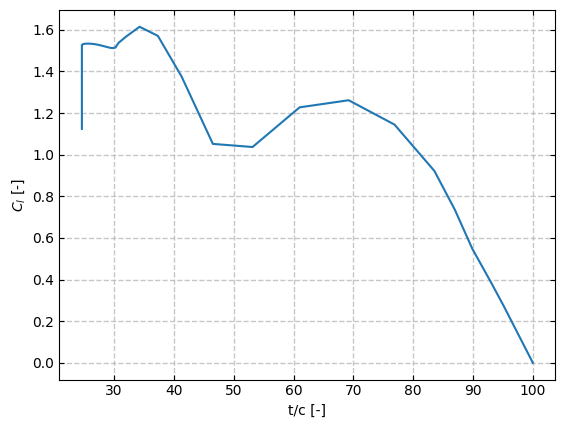

<Figure size 500x300 with 0 Axes>

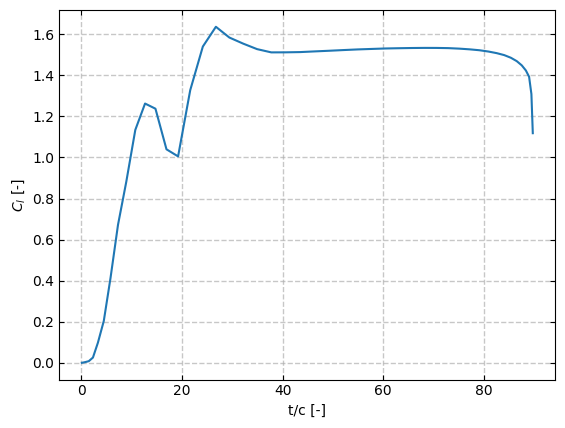

<Figure size 500x300 with 0 Axes>

In [34]:
# fig, axs = plt.subplots(1, 2)

# axs[0].plot(tc_list,Cl_interpolated)
# axs[1].plot(ind_data["s_m"], ind_data["Cl"])
# axs[0].set_ylabel("Cl [-]")
# axs[0].set_xlabel("t/c [-]")
# axs[1].set_xlabel('$r_{\\text{blade}}$ [m]')



plt.plot(tc_list,Cl_interpolated)
plt.ylabel("$C_l$ [-]")
plt.xlabel('t/c [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.figure(figsize=(5, 3))
plt.savefig(Path.cwd().parent / 'Plots/Cl_tc_hawc2s.pdf')
plt.show()

plt.plot(ind_data["s_m"], ind_data["Cl"])
plt.ylabel("$C_l$ [-]")
plt.xlabel('t/c [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.figure(figsize=(5, 3))
plt.savefig(Path.cwd().parent / 'Plots/Cl_r_hawc2s.pdf')
plt.show()




C:\Users\jimwi\PycharmProjects\LAC\LAC\our_design\res_hwac2s\BB_redesign_hawc2s_multitsr_compute_rigid_opt_u8000.ind


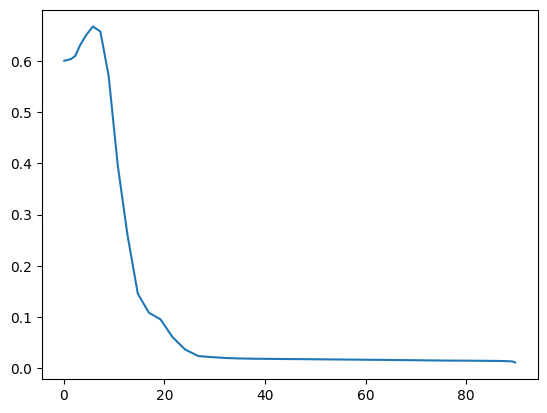

In [35]:
#Plots of the HAWC2S lift coefficient, lift-drag ratio, AoA, axial induction (a), local CT and local CP versus radius at design TSR.

ind_data_path = Path.cwd().parent.parent / 'res_hwac2s' /'BB_redesign_hawc2s_multitsr_compute_rigid_opt_u8000.ind'

ind_data_hawc2s = load_ind(ind_data_path)
# Print the names in the dict
ind_data_hawc2s.keys()



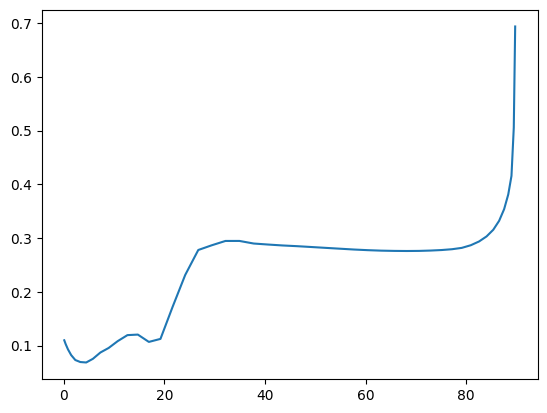

In [36]:
plt.plot(ind_data['s_m'],ind_data['a'])